# Laboratorium 1:  Analiza Danych - Dataframes
Jakub Fabia

## Importowanie bibliotek
Importuję niezbędne biblioteki. Biblioteki te obejmują:
- `CSV` do pracy z plikami CSV,
- `DataFrames` do manipulacji danymi w formie tabelarycznej,
- `Plots` do tworzenia wykresów,
- `Statistics` do obliczeń statystycznych,
- `LinearAlgebra` do operacji na macierzach i wektorach.

In [ ]:
using CSV
using DataFrames
using Plots
using Statistics
using LinearAlgebra

## Funkcje obliczeniowe

Funkcja `generalized_dot` oblicza uogólniony iloczyn skalarny dwóch wektorów `x` i `y` oraz macierzy `A`. 

Funkcja `matrix_vector_product` oblicza iloczyn wektora `x` oraz macierzy `A`.

In [ ]:
function generalized_dot(x::Vector, A::Matrix, y::Vector)
    return dot(x, A, y)
end

generalized_dot (generic function with 1 method)

In [ ]:
function matrix_vector_product(A::Matrix, x::Vector)
    return A * x
end

matrix_vector_product (generic function with 1 method)

## Funkcja mierząca czas obliczania
Funkcja `benchmark_functions` przeprowadza testy wydajnościowe dla funkcji `generalized_dot` oraz `matrix_vector_product`. <br>
Dla różnych rozmiarów macierzy i wektorów (`sizes`) oraz określonej liczby prób (`num_trials`), funkcja generuje losowe macierze `A` oraz wektory `x` i `y`. <br>
Następnie mierzy czas wykonania obu funkcji dla tych danych. Wyniki są zapisywane do pliku CSV o nazwie `pomiary.csv`. <br>
Pierwsza próba dla każdego rozmiaru jest pomijana, ponieważ mierzy także czas kompilacji.

In [ ]:
function benchmark_functions(sizes, num_trials)
    open("pomiary.csv", "w") do file
        CSV.write(file, [], writeheader=true, header=["size", "sample", "time_dot", "time_matrix_vector"])
        for n in sizes
            for i in 0:num_trials
                
                A = rand(n, n)
                x = rand(n)
                y = rand(n)
                
                time_dot = @elapsed generalized_dot(x, A, y);
                time_matrix_vector = @elapsed matrix_vector_product(A, x);
                
                # Skip the first sample, as it measures the compilation time
                if i != 0
                    CSV.write(file, [(n, i, time_dot, time_matrix_vector)], append=true)
                end
            end
        end
    end
end

benchmark_functions (generic function with 1 method)

### Utworzenie pomiarów

In [ ]:
sizes = 800:100:3000
num_trials = 10
benchmark_functions(sizes, num_trials)

## Analiza danych
Wczytuję dane z pliku CSV do DataFrame'a.

In [ ]:
input = "pomiary.csv"
df = CSV.read(input, delim=",", DataFrame)

Row,size,sample,time_dot,time_matrix_vector
,Int64,Int64,Float64,Float64
1,800,1,0.000322445,0.000104369
2,800,2,0.000256236,0.000278618
3,800,3,0.000302507,0.000218102
4,800,4,0.000213551,0.000101791
5,800,5,0.00027267,0.000100237
6,800,6,0.000309247,0.000103335
7,800,7,0.000209001,9.8491e-5
8,800,8,0.000225579,9.9369e-5
9,800,9,0.000270461,0.000103254


Dla każdego rozmiaru wektorów obliczam średnią oraz odchylenie standardowe dla pomiarów obu funkcji.

In [ ]:
plot_df = combine(
    groupby(df, :"size"), 
    "time_dot" => mean, 
    "time_dot" => std, 
    "time_matrix_vector" => mean, 
    "time_matrix_vector" => std
)

Row,size,time_dot_mean,time_dot_std,time_matrix_vector_mean,time_matrix_vector_std
,Int64,Float64,Float64,Float64,Float64
1,800,0.000261641,4.0786e-5,0.000130943,6.35332e-5
2,900,0.000375127,7.4937e-5,0.00013089,9.79952e-6
3,1000,0.000457552,6.19708e-5,0.000168397,1.28746e-5
4,1100,0.000570744,4.94061e-5,0.0001914,1.47919e-5
5,1200,0.000752688,8.66153e-5,0.000271865,5.62093e-5
6,1300,0.000827128,8.94314e-5,0.000292792,4.83489e-5
7,1400,0.00100842,7.32744e-5,0.000384822,6.67708e-5
8,1500,0.00114757,0.000104329,0.000463339,5.65425e-5
9,1600,0.00127914,0.000115292,0.00053446,7.13041e-5


## Wykresy

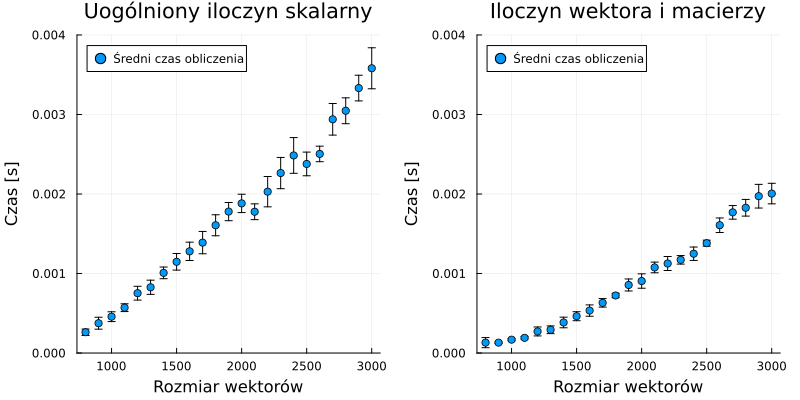

In [ ]:
p1 = scatter(
    plot_df.size, 
    plot_df.time_dot_mean, 
    yerr = plot_df.time_dot_std, 
    label = "Średni czas obliczenia", 
    xlabel = "Rozmiar wektorów", 
    ylabel = "Czas [s]", 
    title = "Uogólniony iloczyn skalarny", 
    legend = :topleft, 
    margin = 3Plots.mm,
    ylims = (0, 0.004)
)
p2 = scatter(
    plot_df.size, 
    plot_df.time_matrix_vector_mean, 
    yerr = plot_df.time_matrix_vector_std, 
    label = "Średni czas obliczenia", 
    xlabel = "Rozmiar wektorów", 
    ylabel = "Czas [s]", 
    title = "Iloczyn wektora i macierzy", 
    legend = :topleft,
    margin = 3Plots.mm,
    ylims = (0, 0.004)
)

plot(p1, p2, layout = (1, 2), size = (800, 400))